In [1]:
print("hi")

hi


In [7]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv('./trainfile.csv')
valdata = pd.read_csv('./valfile.csv')

In [4]:
url_img = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/fracture/training/'
url_val_img = url = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/fracture/validation/'

In [5]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [6]:
device

device(type='cpu')

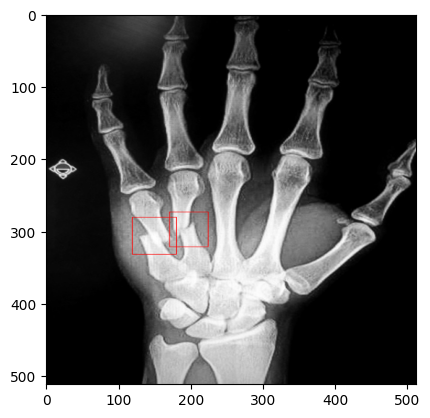

In [8]:
s = '5.jpg'
path = url_img + s
img = cv2.imread(path)
# img =  Image.open(path)
bboxs = data[data['filename']==s]
for index, row in bboxs.iterrows():
    xmin = row['xmin']
    xmax = row['xmax']
    ymin = row['ymin']
    ymax = row['ymax']
    label = row['name']
    cv2.rectangle(img,(xmin,ymin),(xmax, ymax),(255,0,0), 1)
#     font = cv2.FONT_HERSHEY_SIMPLEX
#     cv2.putText(img, label, (xmin+5,ymin+15), font, 0.5, (0,255,0), 1)
img = cv2.resize(img, (512, 512))
plt.imshow(img)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

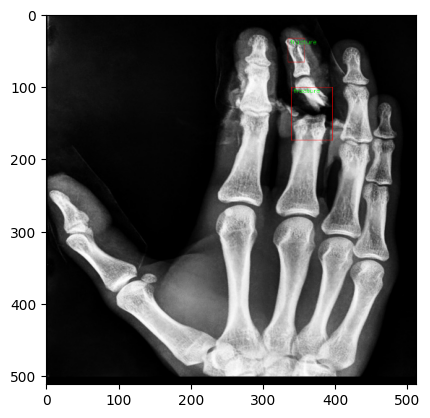

In [9]:
s = '25.jpg'
path = url_val_img + s
img = cv2.imread(path)
# print(img.shape)
# img =  Image.open(path)
bboxs = valdata[valdata['filename']==s]
for index, row in bboxs.iterrows():
    xmin = row['xmin']
    xmax = row['xmax']
    ymin = row['ymin']
    ymax = row['ymax']
    label = row['name']
    cv2.rectangle(img,(xmin,ymin),(xmax, ymax),(255,0,0), 1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, label, (xmin+5,ymin+15), font, 0.5, (0,255,0), 1)
img = cv2.resize(img, (512, 512))
plt.imshow(img)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
mymodel = torch.load('C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/mymodel.pth',  map_location=torch.device('cpu'))

In [11]:
from torchvision import transforms as T
from PIL import Image, ImageDraw

99.22022819519043
97.26619124412537


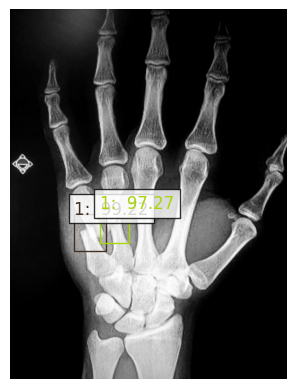

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random
from random import randint, randrange



# Select an image from the validation set
# img, target = data[1]
# img = cv2.imread('/kaggle/input/fracture/fracture/training/0.jpg')
path = url_img+ "5.jpg"
img = Image.open(path)
img1 = cv2.imread(path)

# Preprocess the image
img = T.ToTensor()(img)
# img = img.unsqueeze(0) 
# print(img)
img = img.to(device)
# print(img)
# Make a prediction
mymodel.eval()
with torch.no_grad():
    output = mymodel([img])

# Extract the predicted boxes, labels and scores from the output
pred_boxes = output[0]['boxes'].detach().cpu().numpy()
pred_labels = output[0]['labels'].detach().cpu().numpy()
pred_scores = output[0]['scores'].detach().cpu().numpy()

# Display the image and the predicted boxes
img = F.to_pil_image(img.cpu())
plt.imshow(img)
l = [ (255,0,0), (0, 255 , 0), ( 0 , 0, 255)]
ax = plt.gca()
for i in range(len(pred_boxes)):
    if pred_scores[i] > 0.5:  # Only display boxes with confidence > 0.5
        box = pred_boxes[i]
        label = pred_labels[i]
        score = pred_scores[i]
        color = np.random.rand(3)
        c = randint(0, 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        score = score * 100
        s = str(label) + ":" + "{:.2f}".format(score)
        # print(box)
        b1, b2, b3, b4 = int(box[0]), int(box[1]), int(box[2]), int(box[3]),
        # print(c)
        # print(l[c])
        cv2.rectangle( img1 , ( b1, b2 ), ( b3 , b4), l[c], 1)

        cv2.putText(img1, s , (b1 , b2- 7), font, 0.7, l[c] , 1)
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor=color, linewidth=1))
        
        print(score)
        ax.text(box[0], box[1], f'{label}: {score: .2f}', color=color, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.axis("off")
plt.show()
cv2.imshow("Result", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()

92.27515459060669
82.09285736083984


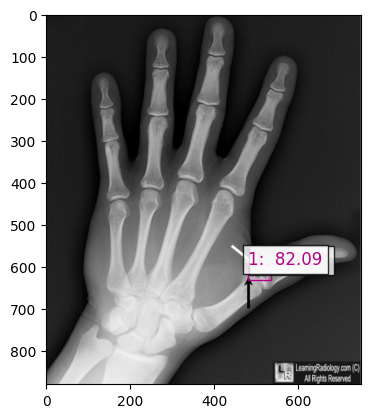

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random
from random import randint, randrange



# Select an image from the validation set
# img, target = data[1]
# img = cv2.imread('/kaggle/input/fracture/fracture/training/0.jpg')
path = url_val_img+ "8.jpg"
img = Image.open(path)
img1 = cv2.imread(path)

# Preprocess the image
img = T.ToTensor()(img)
# img = img.unsqueeze(0) 
# print(img)
img = img.to(device)
# print(img)
# Make a prediction
mymodel.eval()
with torch.no_grad():
    output = mymodel([img])

# Extract the predicted boxes, labels and scores from the output
pred_boxes = output[0]['boxes'].detach().cpu().numpy()
pred_labels = output[0]['labels'].detach().cpu().numpy()
pred_scores = output[0]['scores'].detach().cpu().numpy()

# Display the image and the predicted boxes
img = F.to_pil_image(img.cpu())
plt.imshow(img)
l = [ (255,0,0), (0, 255 , 0), ( 0 , 0, 255)]
ax = plt.gca()
for i in range(len(pred_boxes)):
    if pred_scores[i] > 0.5:  # Only display boxes with confidence > 0.5
        box = pred_boxes[i]
        label = pred_labels[i]
        score = pred_scores[i]
        color = np.random.rand(3)
        c = randint(0, 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        score = score * 100
        s = str(label) + ":" + "{:.2f}".format(score)
        # print(box)
        b1, b2, b3, b4 = int(box[0]), int(box[1]), int(box[2]), int(box[3]),
        # print(c)
        # print(l[c])
        cv2.rectangle( img1 , ( b1, b2 ), ( b3 , b4), l[c], 1)

        cv2.putText(img1, s , (b1 , b2- 7), font, 0.7, l[c] , 1)
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor=color, linewidth=1))
        
        print(score)
        ax.text(box[0], box[1], f'{label}: {score: .2f}', color=color, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
plt.show()
cv2.imshow("Result", img1)
cv2.waitKey(0)
cv2.destroyAllWindows()